<a href="https://colab.research.google.com/github/celinecresswell/IndividualProject/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

## Importing basic libraries and data

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Output-Files/extracted_features.csv")

In [62]:
df.shape

(4928, 58)

In [63]:
df.head()

,species,species_refID,datetime,temp,humid,lengthAudio,log_maxAmp,log_rangeAmp,log_iqrAmp,log_crestFactor,...,harmonics_g.1,harmonics_g.2,harmonics_g.3,harmonics_g.4,harmonics_g.5,harmonics_g.6,harmonics_g.7,harmonics_g.8,harmonics_g.9,harmonics_g.10
0,Aphis fabae,http://purl.obolibrary.org/obo/NCBITaxon_191316,05/02/2020 16:35,25.9,37.5,317,-8.549071,-7.993512,-8.893082,0.741419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aphis fabae,http://purl.obolibrary.org/obo/NCBITaxon_191316,05/02/2020 16:37,25.9,37.0,220,-9.344203,-9.344156,-9.632874,0.622518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aphis fabae,http://purl.obolibrary.org/obo/NCBITaxon_191316,05/02/2020 16:44,26.6,36.0,1124,-8.541728,-8.061483,-9.869175,1.230951,...,0.112305,0.096680,0.237305,0.084961,0.216797,0.351562,0.205078,0.191406,0.175781,0.368164
3,Aphis fabae,http://purl.obolibrary.org/obo/NCBITaxon_191316,05/02/2020 16:51,27.3,35.5,453,-7.704644,-7.197514,-8.373659,0.914719,...,0.127930,0.364258,0.245117,0.162109,0.281250,0.313477,0.189453,0.605469,0.476562,0.702148
4,Aphis fabae,http://purl.obolibrary.org/obo/NCBITaxon_191316,05/02/2020 16:56,27.3,35.0,1013,-8.142131,-7.683218,-9.050776,1.083489,...,0.120117,0.102539,0.239258,0.225586,0.138672,0.333984,0.212891,0.323242,0.085938,0.567383


## **Drop unneeded features**

Features which add no value to the classification predictions were removed. Features which add value included environmental and extracted audio features.

In [64]:
df = df.drop("species_refID",axis =1)
df = df.drop("datetime", axis = 1)
df = df.drop("lengthAudio", axis =1)

In [65]:
#Check that features have beeen removed
df.shape

(4928, 55)

## **Handling Missing Values**

This section checks the percentage of each feature that has null values. If the percentage of each feature that is missing cannot be explained using the MCAR assumption, then the data cannot be deleted and must be imputed.

In [66]:
#Obtain percentage of each feature that is missing
df.isnull().sum()

percent_missing = df.isnull().sum()*100/len(df)
missing_value_df = pd.DataFrame({'column_name':df.columns,
                                 'percent_missing':percent_missing})
print(missing_value_df)

                               column_name  percent_missing
species                            species         0.000000
temp                                  temp         2.942370
humid                                humid         2.942370
log_maxAmp                      log_maxAmp         0.000000
log_rangeAmp                  log_rangeAmp         0.000000
log_iqrAmp                      log_iqrAmp         0.000000
log_crestFactor            log_crestFactor         0.000000
log_power                        log_power         0.000000
log_rms                            log_rms         0.000000
sqrt_domfreq                  sqrt_domfreq         0.892857
bioacousticIndex          bioacousticIndex         0.000000
bioacousticIndex_2      bioacousticIndex_2         0.000000
bioacousticIndex_3      bioacousticIndex_3         0.000000
bioacousticIndex_4      bioacousticIndex_4         0.000000
log_amplitudeIndex      log_amplitudeIndex         0.000000
spectralEntropy            spectralEntro

Missing Data Observations:

The detrended audio data has more than 12% missing from each feature. This is more than 10% which is considered a substantial quantity. The paper which extracted the audio features from the data did not explain why the data was missing and imputed the data. As the MCAR assumption cannot be made, it will be imputed using the fancyimpute library.



In [67]:
pip install fancyimpute

In [68]:
from fancyimpute import IterativeImputer


In [69]:
mice_imputer = IterativeImputer()
df['temp'] = mice_imputer.fit_transform(df[['temp']])
df['humid'] = mice_imputer.fit_transform(df[['humid']])
df['sqrt_domfreq'] = mice_imputer.fit_transform(df[['sqrt_domfreq']])
df['log_maxAmp_g'] = mice_imputer.fit_transform(df[['log_maxAmp_g']])
df['log_rangeAmp_g'] = mice_imputer.fit_transform(df[['log_rangeAmp_g']])
df['log_iqrAmp_g'] = mice_imputer.fit_transform(df[['log_iqrAmp_g']])
df['log_crestFactor_g'] = mice_imputer.fit_transform(df[['log_crestFactor_g']])
df['log_power_g'] = mice_imputer.fit_transform(df[['log_power_g']])
df['log_rms_g'] = mice_imputer.fit_transform(df[['log_rms_g']])
df['log_fundFreq'] = mice_imputer.fit_transform(df[['log_fundFreq']])
df['sqrt_domfreq_g'] = mice_imputer.fit_transform(df[['sqrt_domfreq_g']])
df['bioacousticIndex_g'] = mice_imputer.fit_transform(df[['bioacousticIndex_g']])
df['bioacousticIndex_g_2'] = mice_imputer.fit_transform(df[['bioacousticIndex_g_2']])
df['bioacousticIndex_g_3'] = mice_imputer.fit_transform(df[['bioacousticIndex_g_3']])
df['bioacousticIndex_g_4'] = mice_imputer.fit_transform(df[['bioacousticIndex_g_4']])
df['log_amplitudeIndex_g'] = mice_imputer.fit_transform(df[['log_amplitudeIndex_g']])
df['spectralEntropy_g'] = mice_imputer.fit_transform(df[['spectralEntropy_g']])
df['temporalEntropy_g'] = mice_imputer.fit_transform(df[['temporalEntropy_g']])
df['acousticEntropy_g'] = mice_imputer.fit_transform(df[['acousticEntropy_g']])
df['harmonics_g.1'] = mice_imputer.fit_transform(df[['harmonics_g.1']])
df['harmonics_g.2'] = mice_imputer.fit_transform(df[['harmonics_g.2']])
df['harmonics_g.3'] = mice_imputer.fit_transform(df[['harmonics_g.3']])
df['harmonics_g.4'] = mice_imputer.fit_transform(df[['harmonics_g.4']])
df['harmonics_g.5'] = mice_imputer.fit_transform(df[['harmonics_g.5']])
df['harmonics_g.6'] = mice_imputer.fit_transform(df[['harmonics_g.6']])
df['harmonics_g.7'] = mice_imputer.fit_transform(df[['harmonics_g.7']])
df['harmonics_g.8'] = mice_imputer.fit_transform(df[['harmonics_g.8']])
df['harmonics_g.9'] = mice_imputer.fit_transform(df[['harmonics_g.9']])
df['harmonics_g.10'] = mice_imputer.fit_transform(df[['harmonics_g.10']])
df['log_gamAmp'] = mice_imputer.fit_transform(df[['log_gamAmp']])

In [70]:
#Check that there are no missing values after the imputation
df.isnull().sum()

species                 0
temp                    0
humid                   0
log_maxAmp              0
log_rangeAmp            0
log_iqrAmp              0
log_crestFactor         0
log_power               0
log_rms                 0
sqrt_domfreq            0
bioacousticIndex        0
bioacousticIndex_2      0
bioacousticIndex_3      0
bioacousticIndex_4      0
log_amplitudeIndex      0
spectralEntropy         0
temporalEntropy         0
acousticEntropy         0
harmonics.1             0
harmonics.2             0
harmonics.3             0
harmonics.4             0
harmonics.5             0
harmonics.6             0
harmonics.7             0
harmonics.8             0
harmonics.9             0
harmonics.10            0
log_gamAmp              0
log_maxAmp_g            0
log_rangeAmp_g          0
log_iqrAmp_g            0
log_crestFactor_g       0
log_power_g             0
log_rms_g               0
log_fundFreq            0
sqrt_domfreq_g          0
bioacousticIndex_g      0
bioacousticI

## **Remove Species with a low number of instances**

In [71]:
np.count_nonzero(df['species']=='Aphis fabae')

161

In [72]:
np.count_nonzero(df['species']=='Sitobion avenae')

274

In [73]:
np.count_nonzero(df['species']=='Rhopalosiphum padi')

8

In [74]:
np.count_nonzero(df['species']=='Psylliodes chrysocephala')

186

In [75]:
np.count_nonzero(df['species']=='Brassiocogethes aeneus')

0

In [76]:
np.count_nonzero(df['species']=='Periphyllus testudinaceus')

113

In [77]:
np.count_nonzero(df['species']=='Myzus persicae')

15

In [78]:
np.count_nonzero(df['species']=='Drepanosiphum platanoidis')

3323

In [79]:
df = df[df['species'] != 'Myzus persicae']

In [80]:
np.count_nonzero(df['species']=='Myzus persicae')

0

In [81]:
#Removing Brassiocogethes aeneus
df = df[df['species'] != 'Brassiocogethes aeneus']
np.count_nonzero(df['species']=='Brassiocogethes aeneus')

0

In [82]:
df = df[df['species'] != 'Rhopalosiphum padi']
np.count_nonzero(df['species']=='Rhopalosiphum padi')

0

## **Scaling**

The reason for scaling is that ifg features are not in the same range then they will be treated differently by the machine learning algorithm.

Example is that if one feature has a range of 0-10 or 0-100 then the machine learning algorithm might deduce that the second feature is more important than the first as it has a higher value.

It is also unrealistic to expect that the real data comes in the same range.

Scaling puts the data into the same range - the data is standardised


In [83]:
#See what the numbers are the the data set before scaling so I can double check if it has changed the data in the dataset format
df['sqrt_domfreq']

0       0.356305
1       0.363092
2       0.333659
3       0.354932
4       0.317153
          ...   
4923    0.333659
4924    0.255792
4925    0.229640
4926    0.353553
4927    0.248039
Name: sqrt_domfreq, Length: 4905, dtype: float64

In [84]:
# First to demonstrate the procedure working - Look at the distribution of one of the features before scaling
scaled_df = df[['sqrt_domfreq']]

print('Mean:', scaled_df['sqrt_domfreq'].mean())
print('Standard Deviation:', scaled_df['sqrt_domfreq'].std())

Mean: 0.31623534102366796
Standard Deviation: 0.08245994337173078


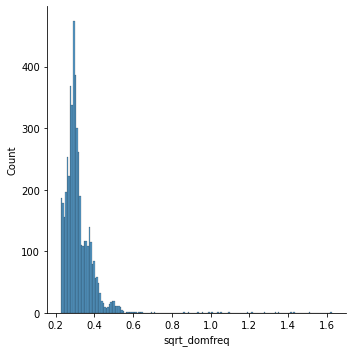

In [85]:
sns.displot(df, x ='sqrt_domfreq')

Scaling options - Mentioned in the tutorial followed include:

1. Standard scaling
2. Min-Max scaling (normalization) - One of the most popular techniques
3. Quantile transformation - when we require the distribution of the data to be uniform or normal
4. Log transform - Data must be positive to use this transformation

In [86]:
# Standard Scaling method of scaling the data
# import the necessary packages reccommended by the tutorial

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [87]:
standard_scaler = StandardScaler()
df['sqrt_domfreq'] = standard_scaler.fit_transform(df[['sqrt_domfreq']])

print('Mean:', df['sqrt_domfreq'].mean())
print('Standard Deviation:', df['sqrt_domfreq'].std())

Mean: -5.217256007667657e-17
Standard Deviation: 1.000101952388504


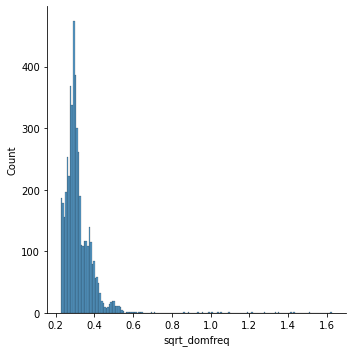

In [88]:
sns.displot(df, x=scaled_df['sqrt_domfreq'])

The distribution is the same but all of the data values are within 3 and -3

In [89]:
df.head(40)


,species,temp,humid,log_maxAmp,log_rangeAmp,log_iqrAmp,log_crestFactor,log_power,log_rms,sqrt_domfreq,...,harmonics_g.1,harmonics_g.2,harmonics_g.3,harmonics_g.4,harmonics_g.5,harmonics_g.6,harmonics_g.7,harmonics_g.8,harmonics_g.9,harmonics_g.10
0,Aphis fabae,25.9,37.5,-8.549071,-7.993512,-8.893082,0.741419,-18.580979,-9.290489,0.485976,...,0.112718,0.157583,0.212023,0.278710,0.351574,0.445553,0.543172,0.659736,0.780671,0.924321
1,Aphis fabae,25.9,37.0,-9.344203,-9.344156,-9.632874,0.622518,-19.933441,-9.966721,0.568296,...,0.112718,0.157583,0.212023,0.278710,0.351574,0.445553,0.543172,0.659736,0.780671,0.924321
2,Aphis fabae,26.6,36.0,-8.541728,-8.061483,-9.869175,1.230951,-19.545358,-9.772679,0.211316,...,0.112305,0.096680,0.237305,0.084961,0.216797,0.351562,0.205078,0.191406,0.175781,0.368164
3,Aphis fabae,27.3,35.5,-7.704644,-7.197514,-8.373659,0.914719,-17.238727,-8.619364,0.469323,...,0.127930,0.364258,0.245117,0.162109,0.281250,0.313477,0.189453,0.605469,0.476562,0.702148
4,Aphis fabae,27.3,35.0,-8.142131,-7.683218,-9.050776,1.083489,-18.451241,-9.225621,0.011128,...,0.120117,0.102539,0.239258,0.225586,0.138672,0.333984,0.212891,0.323242,0.085938,0.567383
5,Aphis fabae,27.3,34.5,-8.529919,-7.957159,-9.546967,1.255365,-19.570567,-9.785283,0.568296,...,0.131836,0.095703,0.113281,0.245117,0.209961,0.216797,0.106445,0.227539,0.436523,0.238281
6,Aphis fabae,27.3,34.5,-8.925962,-8.572907,-9.360741,0.951517,-19.754958,-9.877479,1.987061,...,0.112718,0.157583,0.212023,0.278710,0.351574,0.445553,0.543172,0.659736,0.780671,0.924321
7,Aphis fabae,27.3,34.5,-8.473128,-7.951826,-9.441442,1.271117,-19.488489,-9.744245,0.157715,...,0.108398,0.122070,0.215820,0.104492,0.222656,0.095703,0.230469,0.205078,0.331055,0.338867
8,Aphis fabae,28.0,34.5,-8.226075,-7.627657,-8.490425,0.781417,-18.014985,-9.007493,0.712718,...,0.139648,0.270508,0.097656,0.164062,0.380859,0.183594,0.530273,0.658203,0.357422,0.573242
9,Aphis fabae,28.0,34.5,-8.549613,-7.958719,-9.420369,1.137942,-19.375111,-9.687555,0.759850,...,0.143555,0.106445,0.123047,0.230469,0.249023,0.356445,0.267578,0.238281,0.374023,0.286133


In [90]:
df['sqrt_domfreq']

0       0.485976
1       0.568296
2       0.211316
3       0.469323
4       0.011128
          ...   
4923    0.211316
4924   -0.733074
4925   -1.050262
4926    0.452606
4927   -0.827106
Name: sqrt_domfreq, Length: 4905, dtype: float64

In [91]:
# Scale all of the features
# Except for datetime as it is an object and won't be used in the data analysis
df['temp'] = standard_scaler.fit_transform(df[['temp']])
df['humid'] = standard_scaler.fit_transform(df[['humid']])
df['log_maxAmp'] = standard_scaler.fit_transform(df[['log_maxAmp']])
df['log_rangeAmp'] = standard_scaler.fit_transform(df[['log_rangeAmp']])
df['log_iqrAmp'] = standard_scaler.fit_transform(df[['log_iqrAmp']])
df['log_crestFactor'] = standard_scaler.fit_transform(df[['log_crestFactor']])
df['log_power'] = standard_scaler.fit_transform(df[['log_power']])
df['log_rms'] = standard_scaler.fit_transform(df[['log_rms']])
# sqrt_domfreq already scaled
df['bioacousticIndex'] = standard_scaler.fit_transform(df[['bioacousticIndex']])
df['bioacousticIndex_2'] = standard_scaler.fit_transform(df[['bioacousticIndex_2']])
df['bioacousticIndex_3'] = standard_scaler.fit_transform(df[['bioacousticIndex_3']])
df['bioacousticIndex_4'] = standard_scaler.fit_transform(df[['bioacousticIndex_4']])
df['log_amplitudeIndex'] = standard_scaler.fit_transform(df[['log_amplitudeIndex']])
df['spectralEntropy'] = standard_scaler.fit_transform(df[['spectralEntropy']])
df['temporalEntropy'] = standard_scaler.fit_transform(df[['temporalEntropy']])
df['acousticEntropy'] = standard_scaler.fit_transform(df[['acousticEntropy']])
df['harmonics.1'] = standard_scaler.fit_transform(df[['harmonics.1']])
df['harmonics.2'] = standard_scaler.fit_transform(df[['harmonics.2']])
df['harmonics.3'] = standard_scaler.fit_transform(df[['harmonics.3']])
df['harmonics.4'] = standard_scaler.fit_transform(df[['harmonics.4']])
df['harmonics.5'] = standard_scaler.fit_transform(df[['harmonics.5']])
df['harmonics.6'] = standard_scaler.fit_transform(df[['harmonics.6']])
df['harmonics.7'] = standard_scaler.fit_transform(df[['harmonics.7']])
df['harmonics.8'] = standard_scaler.fit_transform(df[['harmonics.8']])
df['harmonics.9'] = standard_scaler.fit_transform(df[['harmonics.9']])
df['harmonics.10'] = standard_scaler.fit_transform(df[['harmonics.10']])
df['log_gamAmp'] = standard_scaler.fit_transform(df[['log_gamAmp']])
df['log_maxAmp_g'] = standard_scaler.fit_transform(df[['log_maxAmp_g']])
df['log_rangeAmp_g'] = standard_scaler.fit_transform(df[['log_rangeAmp_g']])
df['log_iqrAmp_g'] = standard_scaler.fit_transform(df[['log_iqrAmp_g']])
df['log_crestFactor_g'] = standard_scaler.fit_transform(df[['log_crestFactor_g']])
df['log_power_g'] = standard_scaler.fit_transform(df[['log_power_g']])
df['log_rms_g'] = standard_scaler.fit_transform(df[['log_rms_g']])
df['log_fundFreq'] = standard_scaler.fit_transform(df[['log_fundFreq']])
df['sqrt_domfreq_g'] = standard_scaler.fit_transform(df[['sqrt_domfreq_g']])
df['bioacousticIndex_g'] = standard_scaler.fit_transform(df[['bioacousticIndex_g']])
df['bioacousticIndex_g_2'] = standard_scaler.fit_transform(df[['bioacousticIndex_g_2']])
df['bioacousticIndex_g_3'] = standard_scaler.fit_transform(df[['bioacousticIndex_g_3']])
df['bioacousticIndex_g_4'] = standard_scaler.fit_transform(df[['bioacousticIndex_g_4']])
df['log_amplitudeIndex_g'] = standard_scaler.fit_transform(df[['log_amplitudeIndex_g']])
df['spectralEntropy_g'] = standard_scaler.fit_transform(df[['spectralEntropy_g']])
df['temporalEntropy_g'] = standard_scaler.fit_transform(df[['temporalEntropy_g']])
df['acousticEntropy_g'] = standard_scaler.fit_transform(df[['acousticEntropy_g']])
df['harmonics_g.1'] = standard_scaler.fit_transform(df[['harmonics_g.1']])
df['harmonics_g.2'] = standard_scaler.fit_transform(df[['harmonics_g.2']])
df['harmonics_g.3'] = standard_scaler.fit_transform(df[['harmonics_g.3']])
df['harmonics_g.4'] = standard_scaler.fit_transform(df[['harmonics_g.4']])
df['harmonics_g.5'] = standard_scaler.fit_transform(df[['harmonics_g.5']])
df['harmonics_g.6'] = standard_scaler.fit_transform(df[['harmonics_g.6']])
df['harmonics_g.7'] = standard_scaler.fit_transform(df[['harmonics_g.7']])
df['harmonics_g.8'] = standard_scaler.fit_transform(df[['harmonics_g.8']])
df['harmonics_g.9'] = standard_scaler.fit_transform(df[['harmonics_g.9']])
df['harmonics_g.10'] = standard_scaler.fit_transform(df[['harmonics_g.10']])

In [92]:
df.head()

,species,temp,humid,log_maxAmp,log_rangeAmp,log_iqrAmp,log_crestFactor,log_power,log_rms,sqrt_domfreq,...,harmonics_g.1,harmonics_g.2,harmonics_g.3,harmonics_g.4,harmonics_g.5,harmonics_g.6,harmonics_g.7,harmonics_g.8,harmonics_g.9,harmonics_g.10
0,Aphis fabae,-1.003008,-1.048543,-1.112017,-1.021112,0.252983,-1.162187,-0.702412,-0.702412,0.485976,...,0.000885,0.000805,0.000427,0.001303,0.000586,0.001434,0.001507,0.000355,0.000962,0.001704
1,Aphis fabae,-1.003008,-1.168666,-2.189208,-2.770058,-0.669685,-1.605669,-1.635145,-1.635145,0.568296,...,0.000885,0.000805,0.000427,0.001303,0.000586,0.001434,0.001507,0.000355,0.000962,0.001704
2,Aphis fabae,-0.527897,-1.408912,-1.102070,-1.109128,-0.964400,0.663692,-1.367501,-1.367501,0.211316,...,-0.008371,-0.524279,0.134262,-0.695988,-0.377972,-0.214035,-0.662408,-0.814367,-0.952894,-0.808939
3,Aphis fabae,-0.052786,-1.529035,0.031954,0.009624,0.900807,-0.515803,0.223280,0.223280,0.469323,...,0.341177,1.782681,0.175619,-0.418336,-0.196938,-0.301345,-0.693091,-0.094050,-0.478590,-0.322130
4,Aphis fabae,-0.052786,-1.649158,-0.560724,-0.619313,0.056307,0.113684,-0.612938,-0.612938,0.011128,...,0.166403,-0.473762,0.144601,-0.189888,-0.597407,-0.254332,-0.647067,-0.585021,-1.094570,-0.518562


All of the numerical features have been scaled

## **Feature Selection**

In this section we will use the simplest one and the most often used methods to reduce the number of features from the original 57 - Univariate Feature Selection

It is based on univariate statistical tests.

It calculates how strongly the output feature depends on each feature from the dataset using the statistical tests.

In [93]:
feature_sel_data = df.drop(['species'],axis=1)
selector = SelectKBest(f_classif, k =10)

selected_data = selector.fit_transform(feature_sel_data, df['species'])
selected_data

array([[-1.00300796e+00, -1.04854269e+00,  1.31276002e+00, ...,
         5.10421273e-04,  1.27477307e-03,  2.22175893e-03],
       [-1.00300796e+00, -1.16866565e+00,  1.55553079e-01, ...,
         5.10421273e-04,  1.27477307e-03,  2.22175893e-03],
       [-5.27897062e-01, -1.40891158e+00,  4.03112208e-01, ...,
         9.54045977e-02, -4.88088928e-02,  2.49461087e-01],
       ...,
       [-3.78580034e+00, -1.52903454e+00, -1.76573191e-01, ...,
        -8.96693197e-01,  2.84853325e-02,  3.05195927e-01],
       [-3.78580034e+00, -1.52903454e+00, -8.27357800e-01, ...,
         5.10421273e-04,  1.27477307e-03,  2.22175893e-03],
       [-4.26091123e+00, -1.28878862e+00, -1.70199287e-01, ...,
         1.52206089e-01,  8.92803381e-01, -1.52451720e-01]])

In [94]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=df.index, 
                                 columns=feature_sel_data.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,temp,humid,bioacousticIndex_2,log_maxAmp_g,log_rangeAmp_g,log_power_g,log_rms_g,log_fundFreq,bioacousticIndex_g_3,spectralEntropy_g
0,-1.003008,-1.048543,1.312760,-0.001064,-0.001698,-0.001741,-0.001741,0.000510,0.001275,0.002222
1,-1.003008,-1.168666,0.155553,-0.001064,-0.001698,-0.001741,-0.001741,0.000510,0.001275,0.002222
2,-0.527897,-1.408912,0.403112,-0.635494,-0.546734,-0.286674,-0.286674,0.095405,-0.048809,0.249461
3,-0.052786,-1.529035,0.388375,-0.105535,-0.018360,0.321938,0.321938,0.387956,0.918119,-0.325402
4,-0.052786,-1.649158,-0.280331,-0.852345,-1.182792,-0.962325,-0.962325,0.039409,0.550251,0.606884


The top 10 features from the Selectkbest method:
1. temp
2. humid
3. bioacousticIndex
4. bioacousticIndex_2
5. log_maxAmp_g
6. log_rangeAmp_g
7. log_power_g
8. log_rms_g
9. bioacousticIndex_g_3
10. spectralEntropy_g

Top 10 features from the feature importance in the googlecolab greymodel1 were
1. temp                    0.117724
2. humid                   0.076124
3. harmonics_g.1           0.042629
4. sqrt_domfreq_g          0.038617
5. sqrt_domfreq            0.035946
6. harmonics.5             0.028185
7. harmonics_g.2           0.027235
8. harmonics.4             0.026686
9. harmonics.6             0.026459
10. harmonics.3    

Do we need to use the important features based on the method associated to the classifier model or from the general method of sklearn?

-- Try use these features in another randomforest classifier and see what effect these selected features which have been scaled, have on the accuracy --


In [95]:
selected_features.head()

,temp,humid,log_maxAmp,log_rangeAmp,log_iqrAmp,log_crestFactor,log_power,log_rms,sqrt_domfreq,bioacousticIndex,...,harmonics_g.1,harmonics_g.2,harmonics_g.3,harmonics_g.4,harmonics_g.5,harmonics_g.6,harmonics_g.7,harmonics_g.8,harmonics_g.9,harmonics_g.10
0,-1.003008,-1.048543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.003008,-1.168666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.527897,-1.408912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.052786,-1.529035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.052786,-1.649158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This has made a different dataframe called selected features

Remove the features from the list from df

Note we might have to iterate here and see what the optimal number of features are for accuracy

In [96]:
#Remove the non selected features from the new dataframe
selected_features = selected_features[selected_columns]

#Add the species column into the new dataframe with only the selected features from the univariate feature selection
species = df['species']


selected_features.insert(0,'species',species)

#Check that the new data frame containes only the selected features and the target variable
selected_features.head()

,species,temp,humid,bioacousticIndex_2,log_maxAmp_g,log_rangeAmp_g,log_power_g,log_rms_g,log_fundFreq,bioacousticIndex_g_3,spectralEntropy_g
0,Aphis fabae,-1.003008,-1.048543,1.312760,-0.001064,-0.001698,-0.001741,-0.001741,0.000510,0.001275,0.002222
1,Aphis fabae,-1.003008,-1.168666,0.155553,-0.001064,-0.001698,-0.001741,-0.001741,0.000510,0.001275,0.002222
2,Aphis fabae,-0.527897,-1.408912,0.403112,-0.635494,-0.546734,-0.286674,-0.286674,0.095405,-0.048809,0.249461
3,Aphis fabae,-0.052786,-1.529035,0.388375,-0.105535,-0.018360,0.321938,0.321938,0.387956,0.918119,-0.325402
4,Aphis fabae,-0.052786,-1.649158,-0.280331,-0.852345,-1.182792,-0.962325,-0.962325,0.039409,0.550251,0.606884


In [97]:
#Removing Brassiocogethes aeneus
selected_features = selected_features[selected_features['species'] != 'Brassicogethes aeneus']

In [98]:
cat_arr = np.array(pd.Categorical(selected_features['species']).categories)
print(cat_arr)

['Aphis fabae' 'Drepanosiphum platanoidis' 'Periphyllus testudinaceus'
 'Psylliodes chrysocephala' 'Sitobion avenae']


## Data split

In [99]:
#Set the X and Y values
X = selected_features.drop(['species'], axis=1)
y = selected_features['species']


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size =0.33, random_state =42)

In [101]:
X_train.shape, X_test.shape

((2718, 10), (1339, 10))

## **Data Imbalance Handling**
There is a huge data imbalance. The occurence of DP is x10+ of other species categories.

Data imbalance is common when collected real data.

Drepanosiphum platanoidis is a species that is likely to be detected in fields, therefore the larger amount of data for Drepanosiphum is normal. 

However, imbalance can lead to bias in the classifier model. It is better to sample the data to reduce the imbalance.
This method was also adopted by the paper who supplied the data. They undersampled the data.

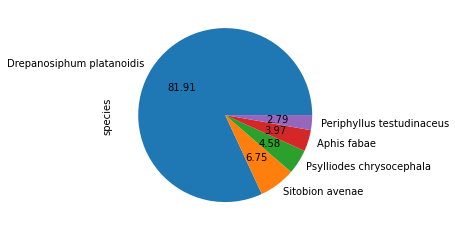

In [102]:
y.value_counts().plot.pie(autopct='%.2f')

In [103]:
import imblearn
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where

In [104]:
print(imblearn.__version__)

0.8.1


In [105]:
#SMOTE must only be applied to the training dataset
#Count and print the number of class instances in the Y training data
counter = Counter(y_train)
print(counter)

Counter({'Drepanosiphum platanoidis': 2231, 'Sitobion avenae': 181, 'Psylliodes chrysocephala': 126, 'Aphis fabae': 106, 'Periphyllus testudinaceus': 74})


Undersampling was the method of choice used by the original paper so it is employed here. Oversampling was experimented with and hashed out.

In [106]:
#To ensure that SMOTE is correctly applied to only the training dataset and not 
#the entire dataset, a pipeline is used
#over = SMOTE(sampling_strategy={'Drepanosiphum platanoidis':1830, 'Sitobion avenae':400, 'Psylliodes chrysocephala':400, 'Aphis fabae':400, 'Periphyllus testudinaceus':400})
under = RandomUnderSampler(sampling_strategy={'Drepanosiphum platanoidis':300, 'Sitobion avenae':120, 'Psylliodes chrysocephala':75, 'Aphis fabae':75, 'Periphyllus testudinaceus':50})
steps = [('u',under)]
#steps = [('o',over),('u',under)]
pipeline = Pipeline(steps=steps)

In [107]:
#SMOTE transformation
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [108]:
#Summarise the transformed training data
counter = Counter(y_train)
print(counter)

Counter({'Drepanosiphum platanoidis': 300, 'Sitobion avenae': 120, 'Aphis fabae': 75, 'Psylliodes chrysocephala': 75, 'Periphyllus testudinaceus': 50})


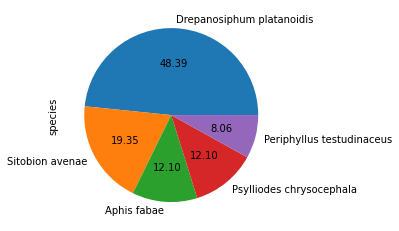

In [109]:
y_train.value_counts().plot.pie(autopct='%.2f')

# **SVM Machine Learning Model**
This is the first machine learning model experiment to apply the XAI models to.


In [110]:
#import SVC classifier
from sklearn.svm import SVC

#import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

SVC classifier

In [111]:
#instantiate classifier with default hyperparameters

svc = SVC(probability=True)

#fit classifier to training set
svc.fit(X_train,y_train)

#make predictions on test set
y_pred=svc.predict(X_test)

#Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Model f1 score with default hyperparameters:{0:0.4f}'.format(f1_score(y_test, y_pred, average = "macro")))
print('Model precision with default hyperparameters:{0:0.4f}'.format(precision_score(y_test, y_pred, average = "macro")))
print('Model recall score with default hyperparameters:{0:0.4f}'.format(recall_score(y_test, y_pred, average = "macro")))

Model accuracy score with default hyperparameters: 0.9126
Model f1 score with default hyperparameters:0.7131
Model precision with default hyperparameters:0.7714
Model recall score with default hyperparameters:0.6827


C = 1 model accuracy metrics:

Model accuracy score with default hyperparameters: 0.9089

Model f1 score with default hyperparameters:0.7127

Model precision with default hyperparameters:0.7742

Model recall score with default hyperparameters:0.7068

Hashed out: SVC Hyperparameter optimisation

In [112]:
# We are aware of outliers in the dataset so increase the value of C 
#higher C means fewer outliers

#instantiate classifier with rbf kernel and C =100
#svc_100=SVC(C=100.0, probability=True)

#fit classifier to training set
#svc_100.fit(X_train, y_train)

#make predictions on test set
#y_pred_100 = svc_100.predict(X_test)

#compute and print accuracy score
#print('Model accuracy score with rbf kernel and C=100.0:{0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))
#print('Model f1 score with rbf kernel and C=100.0:{0:0.4f}'.format(f1_score(y_test, y_pred_100, average = "macro")))
#print('Model precision with rbf kernel and C=100.0:{0:0.4f}'.format(precision_score(y_test, y_pred_100, average = "macro")))
#print('Model recall score with rbf kernel and C=100.0s:{0:0.4f}'.format(recall_score(y_test, y_pred_100, average = "macro")))

C = 100 model accuracy metrics:

Model accuracy score with rbf kernel and C=100.0:0.8730

Model f1 score with rbf kernel and C=100.0:0.6694

Model precision with rbf kernel and C=100.0:0.6372

Model recall score with rbf kernel and C=100.0s:0.7207

Hashed out: SVC Hyperparameter optimisation

In [113]:
#instantiate classifier with rbf kernel and C =1000
#svc_1000=SVC(C=1000.0, probability = True)

#fit classifier to training set
#svc_1000.fit(X_train, y_train)

#make predictions on test set
#y_pred_1000 = svc_1000.predict(X_test)

#compute and print accuracy score
#print('Model accuracy score with rbf kernel and C=1000.0:{0:0.4f}'.format(accuracy_score(y_test, y_pred_1000)))
#print('Model f1 score with rbf kernel and C=1000.0:{0:0.4f}'.format(f1_score(y_test, y_pred_1000, average = "macro")))
#print('Model precision with rbf kernel and C=1000.0:{0:0.4f}'.format(precision_score(y_test, y_pred_1000, average = "macro")))
#print('Model recall score with rbf kernel and C=1000.0s:{0:0.4f}'.format(recall_score(y_test, y_pred_1000, average = "macro")))

C = 1000 model accuracy metrics:

Model accuracy score with rbf kernel and C=1000.0:0.8394

Model f1 score with rbf kernel and C=1000.0:0.6102

Model precision with rbf kernel and C=1000.0:0.5747

Model recall score with rbf kernel and C=1000.0s:0.6588

Observations
1. Model accuracy is higher with a higher C value of 100 which is prefered as higher C values remove more of the outliers; outliers which are observed to be present from the pretests of the models
2. Increasing C from 1 to 100, resulted in an overall decrease in percentage change of accuracy metrics of -25.75%
3. Increasing C from 1 to 1000, resulted in an overall decrease in percentage change of accuracy metrics of -17.73%
4. C = 1 will be used, the other versions will be hashed out.

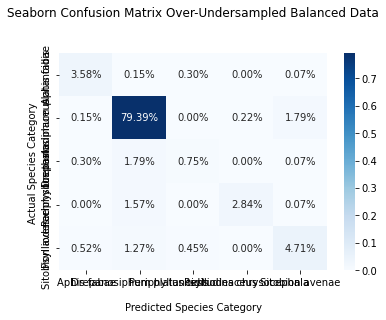

In [114]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#Make Confusion Matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix Over-Undersampled Balanced Data\n\n');
ax.set_xlabel('\nPredicted Species Category')
ax.set_ylabel('Actual Species Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Aphis fabae','Drepanosiphum platanoidis','Periphyllus testudinaceus','Psylliodes chrysocephala','Sitobion avenae'])
ax.yaxis.set_ticklabels(['Aphis fabae','Drepanosiphum platanoidis','Periphyllus testudinaceus','Psylliodes chrysocephala','Sitobion avenae'])

## Display the visualization of the Confusion Matrix.
plt.show()

# **XAI**

## **LIME**

In [115]:
!pip install lime

In [116]:
import lime 
import lime.lime_tabular

In [117]:
class_names = ['Aphis fabae','Drepanosiphum platanoidis','Periphyllus testudinaceus','Psylliodes chrysocephala','Sitobion avenae']

In [118]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=class_names, verbose=True, mode='classification')

In [119]:
# Choose the jth instance and use it to predict the results for that selection
j = 50
exp = explainer.explain_instance(X_test.values[j], svc.predict_proba, num_features=15, top_labels=5)

Intercept 0.23424308413860204
Prediction_local [-0.01235712]
Right: 0.004771930610414158
Intercept 0.6580809884335505
Prediction_local [0.17036706]
Right: 0.018631210422301484
Intercept 0.0573725029107601
Prediction_local [0.38873289]
Right: 0.056170779296557345
Intercept 0.07931836499414227
Prediction_local [0.25901387]
Right: 0.07263053820570907
Intercept -0.02901494047705496
Prediction_local [0.19424331]
Right: 0.8477955414650177


In [120]:
X_test.values[j]
y_test.values[j]

'Aphis fabae'

In [121]:
#Save lime output for better visuals
exp.save_to_file('lime.html')

In [122]:
# Show the predictions
exp.show_in_notebook(show_table='Aphis fabae',show_all=False)

## **ALE plots**

*ALE Plots*
An AlE plot was chosen over the PDP plot as PDP plots assume independence between features. This leads to largely errorneous results. ALE produce better results in spite of the prescence of potential correlation.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers.ale import ALE, plot_ale

In [ ]:
print(selected_features.columns)

In [ ]:
#Initialise predict_proba for machine learning model
proba_fun_svm = svc.predict_proba
features_list = list(selected_features.columns)
#Feature 1 - temp
proba_ale_svm = ALE(proba_fun_svm, feature_names=features_list, target_names =['Aphis fabae','Sitobian avenae','Psylliodes chrysocephala','Drepanosiphum platanoidis','Periphyllus testudinaceus' ])

In [ ]:
proba_exp_svm = proba_ale_svm.explain(X_test.values)

In [ ]:
#plot_ale(proba_exp_svm, n_cols=3, fig_kw={'figwidth':12,'figheight':18})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47baf55ed0>]],
      dtype=object)

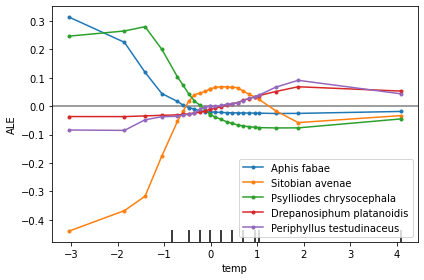

In [ ]:
plot_ale(proba_exp_svm, features=['temp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4979e1fc50>]],
      dtype=object)

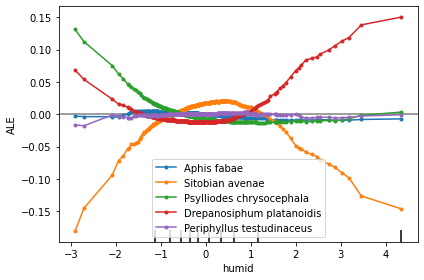

In [ ]:
plot_ale(proba_exp_svm, features = ['humid'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bae43110>]],
      dtype=object)

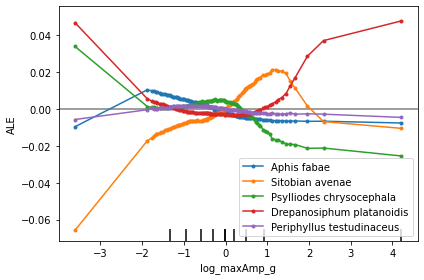

In [ ]:
plot_ale(proba_exp_svm, features = ['log_maxAmp_g'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bad78a10>]],
      dtype=object)

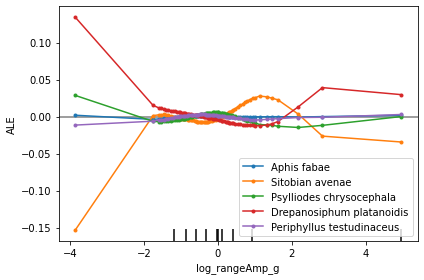

In [ ]:
plot_ale(proba_exp_svm, features = ['log_rangeAmp_g'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bad78690>]],
      dtype=object)

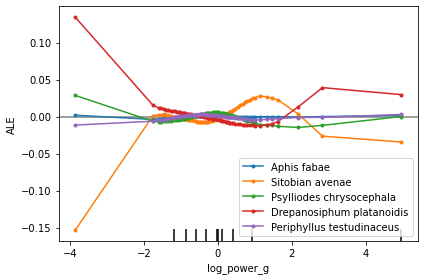

In [ ]:
plot_ale(proba_exp_svm, features = ['log_power_g'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bac40210>]],
      dtype=object)

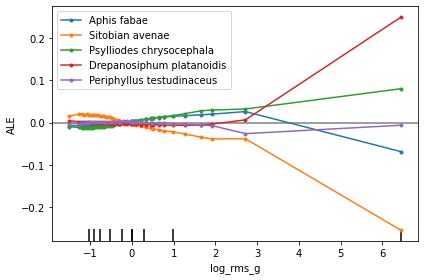

In [ ]:
plot_ale(proba_exp_svm, features = ['log_rms_g'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bab6bdd0>]],
      dtype=object)

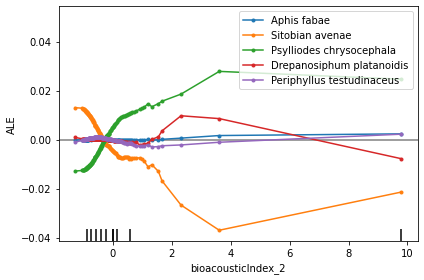

In [ ]:
plot_ale(proba_exp_svm, features = ['bioacousticIndex_2'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bab05510>]],
      dtype=object)

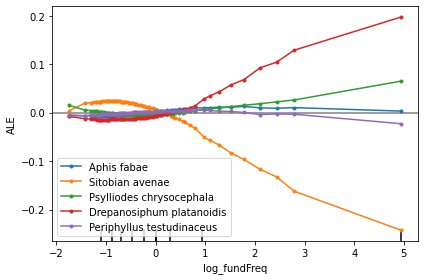

In [ ]:
plot_ale(proba_exp_svm, features = ['log_fundFreq'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47baa25710>]],
      dtype=object)

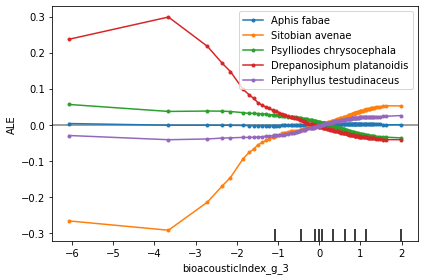

In [ ]:
plot_ale(proba_exp_svm, features = ['bioacousticIndex_g_3'])

The spectralEntropy_g ALE plot was not working so alternative approach to obtain the graph

In [ ]:
features_list2 = list(['spectralEntropy_g'])
proba_ale_svm2 = ALE(proba_fun_svm, feature_names=features_list2, target_names =['Aphis fabae','Sitobian avenae','Psylliodes chrysocephala','Drepanosiphum platanoidis','Periphyllus testudinaceus' ])

In [ ]:
proba_exp_svm = proba_ale_svm2.explain(X_test.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47baeac950>]],
      dtype=object)

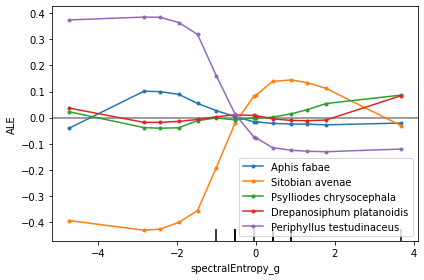

In [ ]:
plot_ale(proba_exp_svm, features = [0])

<function matplotlib.pyplot.show(*args, **kw)>

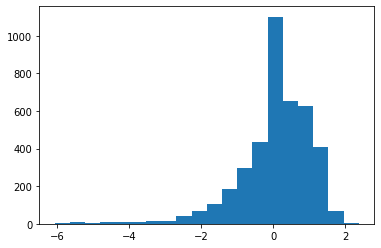

In [ ]:
x = selected_features['spectralEntropy_g']
plt.hist(x, bins = 20)
plt.show

## **Permuation Feature Importance**

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1126 ± 0.0142,temp
0.0945 ± 0.0182,humid
0.0154 ± 0.0054,spectralEntropy_g
0.0130 ± 0.0048,bioacousticIndex_g_3
0.0037 ± 0.0025,log_maxAmp_g
0.0033 ± 0.0041,log_fundFreq
0.0004 ± 0.0034,bioacousticIndex_2
-0.0010 ± 0.0024,log_rangeAmp_g
-0.0013 ± 0.0045,log_rms_g
-0.0013 ± 0.0047,log_power_g


## **SHAP**
A method for assigning payouts to players depending on their contribution to the total payout.


The average marginal contribution of a feature value across all possible coalitions

In [ ]:
!pip install shap

In [ ]:
import shap
from shap import kmeans

In [ ]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svc.predict_proba, X_train, link="logit")
shap_valuesx = explainer.shap_values(X_test, n_samples = 100)

Using 620 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1339 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
#Selected instance details
print(X_test.iloc[0,:])
print(y_pred[0])

In [ ]:
class_names = ['Aphis fabae','Drepanosiphum platanoidis','Periphyllus testudinaceus','Psylliodes chrysocephala','Sitobion avenae']
shap.summary_plot(shap_valuesx, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

In [ ]:
shap.initjs()
# plot the SHAP values for the output of the first instance
f = shap.force_plot(explainer.expected_value[1], shap_valuesx[1][0,:], X_test.iloc[0,:], link="logit")
#expected_value[1] = Expected value for instance which in this case is class 1 (Drepanosiphum platanoidis)

#For clearer visualisation export as html for viewing seperately
shap.save_html("index.htm", f)

#show plot in notebook to show it works
f

In [ ]:
shap.initjs()
#Alternative plot to show payouts for particular instances
shap.force_plot(explainer.expected_value[1], shap_valuesx[1], X_test)

# **The Bayesian network**


## **Correlation observations**

### Pearson correlation chart

In [ ]:
from scipy.stats.stats import pearsonr
import scipy.stats as st


In [ ]:
#Check correlations using the Pearson correlation coefficient
columns = X_train[X + y].columns.tolist()
nColumns = len(columns)
result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = pearsonr(X_train.loc[:, columns[col_a]], X_train.loc[:,  columns[col_b]])[0]
        
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(result, yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()

This correlation chart does not work with categorical variables. The target variable is species which is a categorical variable. Try another correlation package.

### dython Correlation Chart
This package provides correlations between categorical and numerical variables.

In [ ]:
!pip install dython

In [ ]:
from dython import nominal

In [ ]:
nominal.associations(selected_features, figsize = (20,10), mark_columns = True)

Interpreting the correlation:

- The range is from 1 to -1
- Extreme values of 1 or -1 indicate a perfectly linear relationship
- The sign indicates the direction of the relationship

##Data binning
The method below does not work without binning the continous data. This will be done first.

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(selected_features["humid"])

# set x/y labels and plot title
plt.pyplot.xlabel("temp")
plt.pyplot.ylabel("count")
plt.pyplot.title("temp bins")

In [ ]:
bins = np.linspace(min(selected_features["temp"]), max(selected_features["temp"]), 6)
binsHumid = np.linspace(min(selected_features["humid"]),max(selected_features["humid"]),6)
binsfundfreq = np.linspace(min(selected_features["log_fundFreq"]),max(selected_features["log_fundFreq"]),6)
binsbioacousticIndex2 = np.linspace(min(selected_features["bioacousticIndex_2"]),max(selected_features["bioacousticIndex_2"]),6)
binsLogMaxAmpg = np.linspace(min(selected_features["log_maxAmp_g"]),max(selected_features["log_maxAmp_g"]),6)
binsLogRgAmpg = np.linspace(min(selected_features["log_rangeAmp_g"]),max(selected_features["log_rangeAmp_g"]),6)
binsPowerg = np.linspace(min(selected_features["log_power_g"]),max(selected_features["log_power_g"]),6)
binsRmsg = np.linspace(min(selected_features["log_rms_g"]),max(selected_features["log_rms_g"]),6)
binsbioacousticIndex3g = np.linspace(min(selected_features["bioacousticIndex_g_3"]),max(selected_features["bioacousticIndex_g_3"]),6)
binsSEg = np.linspace(min(selected_features["spectralEntropy_g"]),max(selected_features["spectralEntropy_g"]),6)


In [ ]:
bins

In [ ]:
#Assign bin labels
group_names = ['Lowest','Low','Medium','High','Highest']

In [ ]:
selected_features['temp'] = pd.cut(selected_features['temp'], bins, labels=group_names, include_lowest=True )
selected_features['humid'] = pd.cut(selected_features['humid'], binsHumid, labels=group_names, include_lowest=True )
selected_features['bioacousticIndex_2'] = pd.cut(selected_features['bioacousticIndex_2'], binsbioacousticIndex2, labels=group_names, include_lowest=True )
selected_features['log_maxAmp_g'] = pd.cut(selected_features['log_maxAmp_g'], binsLogMaxAmpg, labels=group_names, include_lowest=True ) 
selected_features['log_rangeAmp_g'] = pd.cut(selected_features['log_rangeAmp_g'], binsLogRgAmpg, labels=group_names, include_lowest=True ) 
selected_features['log_power_g'] = pd.cut(selected_features['log_power_g'], binsPowerg, labels=group_names, include_lowest=True )
selected_features['log_rms_g'] = pd.cut(selected_features['log_rms_g'], binsRmsg, labels=group_names, include_lowest=True ) 
selected_features['log_fundFreq'] = pd.cut(selected_features['log_fundFreq'], binsfundfreq, labels=group_names, include_lowest=True )
selected_features['bioacousticIndex_g_3'] = pd.cut(selected_features['bioacousticIndex_g_3'], binsbioacousticIndex3g, labels=group_names, include_lowest=True )
selected_features['spectralEntropy_g'] = pd.cut(selected_features['spectralEntropy_g'], binsSEg, labels=group_names, include_lowest=True )


In [ ]:
selected_features.head()

## Bayesian network

In [ ]:
pip install bnlearn

In [ ]:
pip install -U matplotlib

In [ ]:
import bnlearn as bn

### Structure learning

In [ ]:
#learn the dag in data using bayesian structure learning
DAG = bn.structure_learning.fit(selected_features, methodtype = 'hc', scoretype = 'bic')

In [ ]:
#print adjacency matrix
print(DAG['adjmat'])

In [ ]:
#plot
G=bn.plot(DAG)

In [ ]:
import tabulate
from tabulate import tabulate as tb

In [ ]:
# Compute edge strength using chi-square independence test
model1 = bn.independence_test(DAG, selected_features, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

# Examine the output of the chi-square test. 53 edges are detected but not all P values are significant, i.e. those with stat_test=False
print(tb(model1['independence_test'], headers="keys"))


### Conditional probability tables

In [ ]:
model_mle = bn.parameter_learning.fit(DAG, selected_features, methodtype = 'maximumlikelihood')

In [ ]:
x2 = bn.inference.fit(model_mle, variables=['species'],evidence = {'temp': 'Lowest'})
print(x2)

**Retrival of required CPTs for evaluation**

In [ ]:
np.where(DAG['adjmat'])

In [ ]:
H = (DAG['adjmat']==True).apply(lambda y: DAG['adjmat'].columns[y.tolist()], axis=1).to_dict()

In [ ]:
print(H)

In [ ]:
l = len(H)
print(l)

In [ ]:
for k,v in H.items():
    print(k,v)

In [ ]:
all_pairs = list(H.items())
i=0
while i < 11:
 print('Key value pair: ', all_pairs[i])
 i += 1

The following section of code lists through the key (parent) and value (child) pairs and obtains the conditional probability values for each evidence (bin) that can occur.

In [ ]:
binDict = {'species': 2, 'temp':1, 'humid':1,'log_maxAmp_g':1,'log_rms_g':1, 'log_rangeAmp_g':1, 'bioacousticIndex_g_3':1, 'spectralEntropy_g':1, 'bioacousticIndex_2':1, 'log_fundFreq':1, 'log_power_g':1}
latin = ('Aphis fabae','Drepanosiphum platanoidis','Periphyllus testudinaceus','Psylliodes chrysocephala','Sitobion avenae')
notLatin = ('Lowest', 'Low', 'Medium', 'High', 'Highest')

i=0
for k in H.keys():
  for v in H[k]:
    group = binDict[k]
    if group == 1:
      binGroup = notLatin
    elif group == 2:
      binGroup = latin
    
    for p in binGroup:
      i = i+1
      print(k,v)
      print(p)
      #C = log_power  P = log_rangeAmp
      globals()['z'+str(i)] = bn.inference.fit(model_mle, variables=[v], evidence={k:p})

print('This is i value: 0', z1)


#print(H[1][0])